In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Separating Hyperline Manually

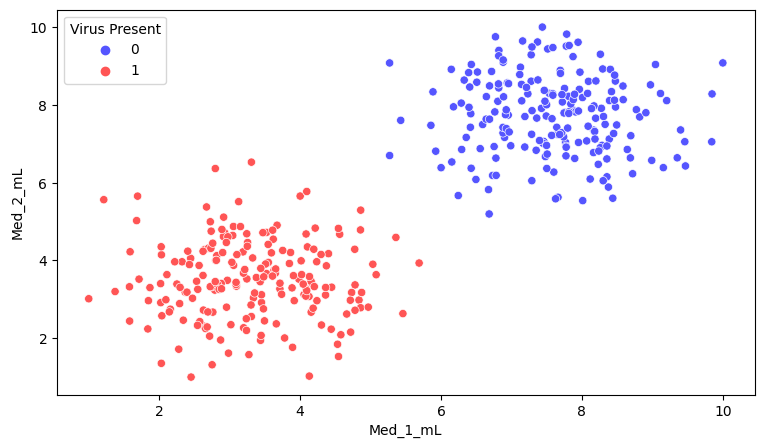

In [8]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data = df, palette = "seismic");

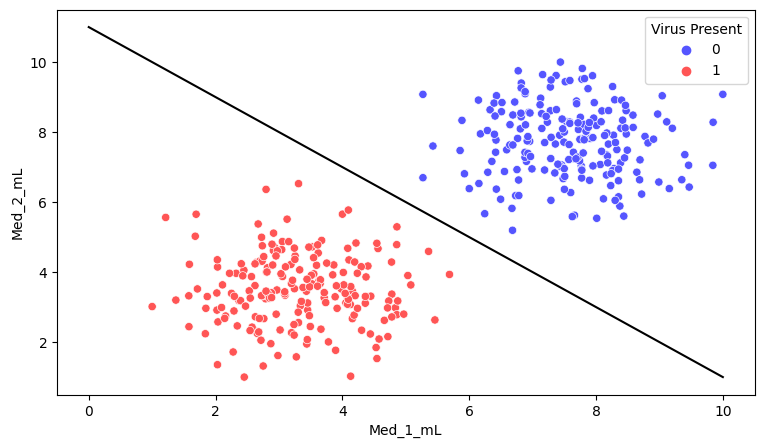

In [9]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data = df, palette = "seismic");
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, "black")

## SVM - Support Vector Machine

In [10]:
from sklearn.svm import SVC

In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [12]:
X = df.drop("Virus Present", axis=1)
y = df["Virus Present"]

In [32]:
model = SVC(kernel = "linear", C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [33]:
from svm_margin_plot import plot_svm_boundary

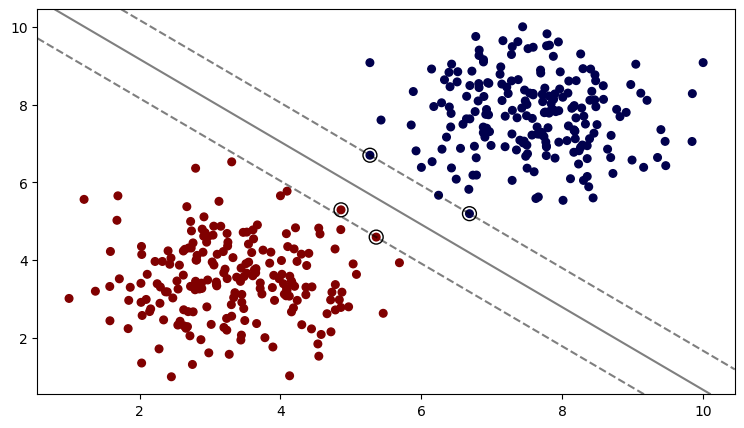

In [34]:
plot_svm_boundary(model, X, y)

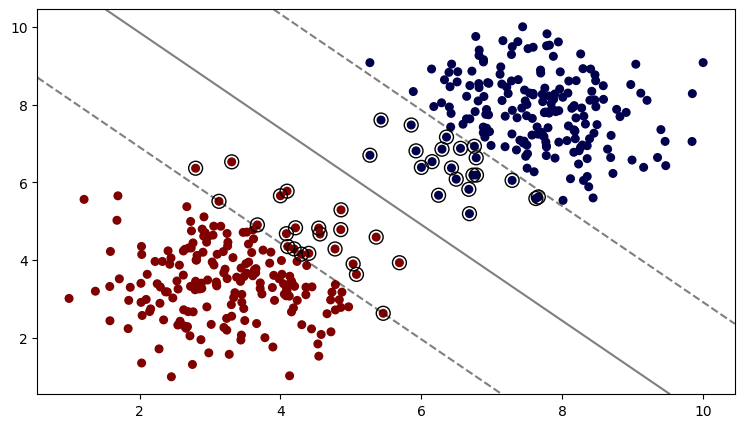

In [36]:
model = SVC(kernel="linear", C=0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)

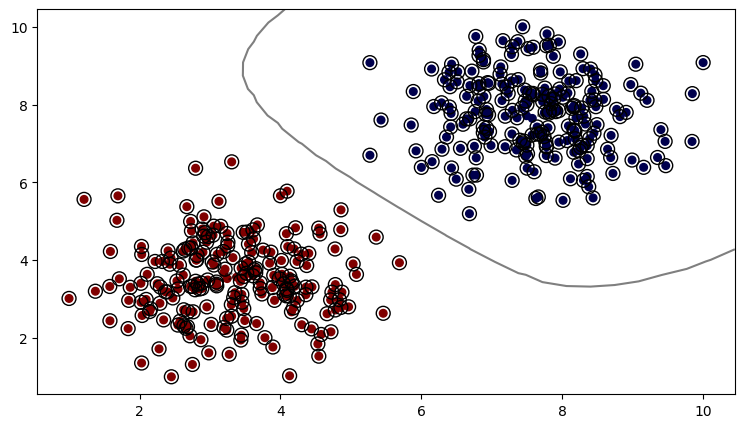

In [37]:
model = SVC(kernel="rbf", C=0.01, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

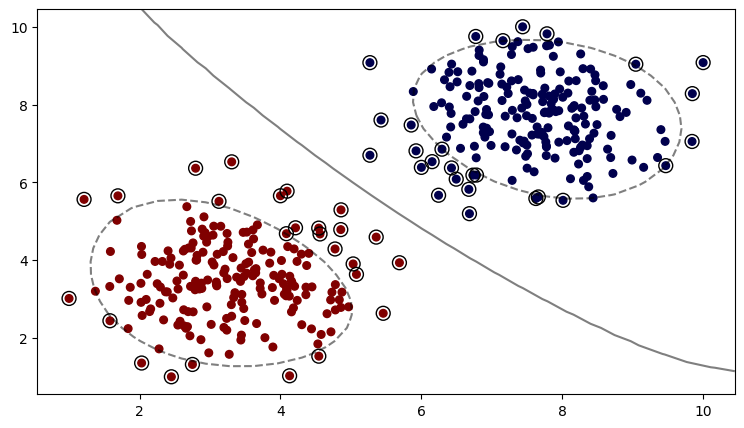

In [45]:
model = SVC(kernel="rbf", C=0.1, gamma="scale")
model.fit(X, y)
plot_svm_boundary(model, X, y)

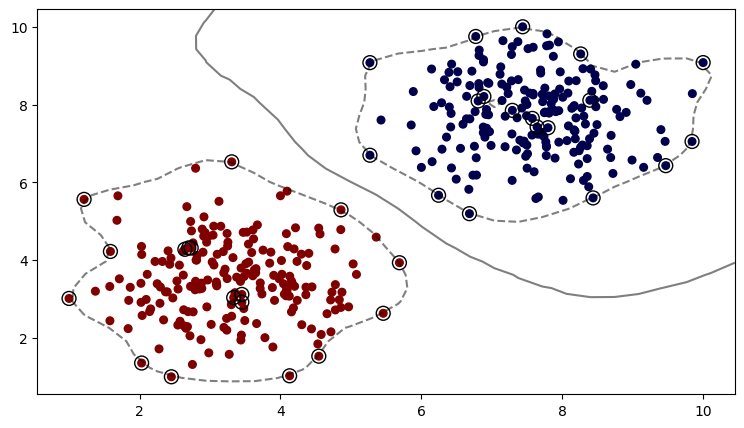

In [46]:
model = SVC(kernel="rbf", C=10, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## Gamma

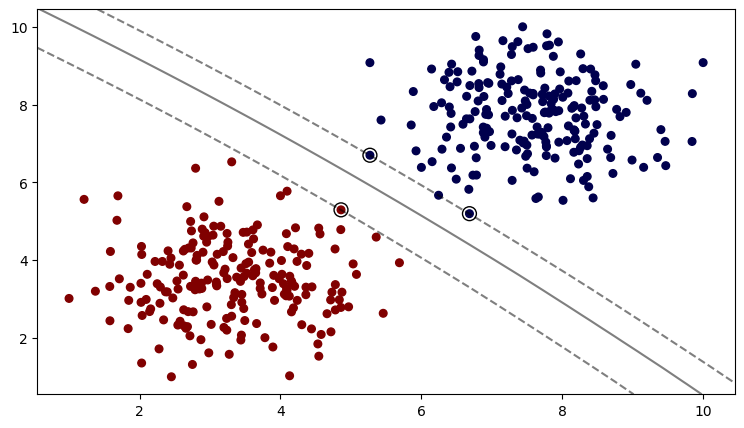

In [48]:
model = SVC(kernel="poly", C=1, degree=5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

# Grid Search

In [50]:
## C and gamma are higher model goes to overfittinng

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [53]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [54]:
grid.best_score_

1.0

In [55]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
##